# Requesting Argo BGC data from Ifremer erddap, expert mode

Using the expert mode, you can have access to all fields retrieved from the erddap, including all QC variables and without any data mode filtering.

***
Script prepared by [Guillaume Maze](http://github.com/gmaze) (Mar. 2020)

In [1]:
import sys, os
import numpy as np
import xarray as xr

try:
    import argopy
except ModuleNotFoundError:
    !pip install git+http://github.com/euroargodev/argopy.git@master
    import argopy
print("argopy:", argopy.__version__)
from argopy import DataFetcher as ArgoDataFetcher

#
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import cmocean
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

# Usefull colormaps and colorbar makers:
qcmap = mpl.colors.ListedColormap(['#000000', 
                                   '#31FC03', 
                                   '#ADFC03', 
                                   '#FCBA03', 
                                   '#FC1C03',
                                   '#324CA8', 
                                   '#000000', 
                                   '#000000', 
                                   '#B22CC9', 
                                   '#000000'])
def colorbar_qc(cmap, **kwargs):
    """Adjust colorbar ticks with discrete colors for QC flags"""
    ncolors = 10
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    return colorbar

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['A','D','R'])

dmode_map = mpl.colors.ListedColormap(['#FCBA03','#31FC03','#FF0000'])
def colorbar_dmode(cmap=dmode_map, **kwargs):
    """Adjust colorbar ticks with discrete colors for DATA MODE"""
    ncolors = 3
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(le.classes_)
    return colorbar

argopy: 0.1.1


# Create the Argo data loader instance

If we want to retrieve data without post-processing, we need to specify the ``mode`` option to ``expert`` when creating the data loader instance.

In [2]:
# argo_loader = ArgoDataFetcher(mode='expert')
# argo_loader = ArgoDataFetcher(mode='expert', cachedir='tmp')
argo_loader = ArgoDataFetcher(mode='expert', ds='bgc')
argo_loader

<datafetcher 'Not initialised'>
Backend: erddap
Fetchers: profile, float, region
User mode: expert

# Example of data fetching for a specific region (Upper Equatorial East-Pacific)

**NOTE**: if the following cell is raising a "Internal Server Error", simply try to reload it (this is due to a long (>1min) delay in preparing the response)

In [3]:
# box = [-120., -85., -10, 10, 0, 1000, '2018-01-01','2018-12-31']
# box = [-120., -85., -10, 10, 0, 500, '2019-01-01','2019-12-31']
box = [-120., -85., -10, 10, 0, 500, '2017-01-01','2017-12-31']
# box = [-120., -85., -30, -10, 0, 500, '2019-01-01','2019-12-31']
ds = argo_loader.region(box).to_xarray()
ds

<xarray.Dataset>
Dimensions:              (N_POINTS: 2575)
Coordinates:
    TIME                 (N_POINTS) datetime64[ns] 2017-01-01T21:18:00 ... 2017-12-27T21:25:00
    LATITUDE             (N_POINTS) float64 -5.203 -5.203 ... -5.538 -5.538
  * N_POINTS             (N_POINTS) int64 0 1 2 3 4 ... 2570 2571 2572 2573 2574
    LONGITUDE            (N_POINTS) float64 -93.53 -93.53 ... -100.1 -100.1
Data variables:
    CYCLE_NUMBER         (N_POINTS) int64 107 107 107 107 ... 143 143 143 143
    DATA_MODE            (N_POINTS) <U1 'R' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION            (N_POINTS) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    DOXY                 (N_POINTS) float64 203.0 202.7 202.9 ... 2.981 3.579
    DOXY_ADJUSTED        (N_POINTS) float64 nan nan nan nan ... nan nan nan nan
    DOXY_ADJUSTED_ERROR  (N_POINTS) float64 nan nan nan nan ... nan nan nan nan
    DOXY_ADJUSTED_QC     (N_POINTS) int64 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    DOXY_QC              (N_POINTS) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PLATFORM_NUMBER      (N_POINTS) int64 6901459 6901459 ... 6901459 6901459
    POSITION_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES                 (N_POINTS) float64 1.0 4.0 8.0 ... 438.0 463.0 488.0
    PRES_ADJUSTED        (N_POINTS) float64 nan 4.0 8.0 ... 438.0 463.0 488.0
    PRES_ADJUSTED_ERROR  (N_POINTS) float64 nan 2.4 2.4 2.4 ... 2.4 2.4 2.4 2.4
    PRES_ADJUSTED_QC     (N_POINTS) int64 0 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRES_QC              (N_POINTS) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PSAL                 (N_POINTS) float64 34.86 34.91 34.94 ... 34.7 34.67
    PSAL_ADJUSTED        (N_POINTS) float64 nan 34.91 34.94 ... 34.73 34.7 34.67
    PSAL_ADJUSTED_ERROR  (N_POINTS) float64 nan 0.01 0.01 ... 0.01 0.01 0.01
    PSAL_ADJUSTED_QC     (N_POINTS) int64 0 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PSAL_QC              (N_POINTS) int64 3 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP                 (N_POINTS) float64 24.94 24.85 24.66 ... 9.288 8.726
    TEMP_ADJUSTED        (N_POINTS) float64 nan 24.85 24.66 ... 9.288 8.726
    TEMP_ADJUSTED_ERROR  (N_POINTS) float64 nan 0.002 0.002 ... 0.002 0.002
    TEMP_ADJUSTED_QC     (N_POINTS) int64 0 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMP_QC              (N_POINTS) int64 3 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC              (N_POINTS) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO-BGC
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         http://www.ifremer.fr/erddap
    Fetched_by:           gmaze
    Fetched_date:         2020/04/06
    Fetched_constraints:  bgc_[x=-120.00/-85.00; y=-10.00/10.00; z=0.0/500.0;...
    Fetched_url:          http://www.ifremer.fr/erddap/tabledap/ArgoFloats-bi...

## QC figure with unfiltered data

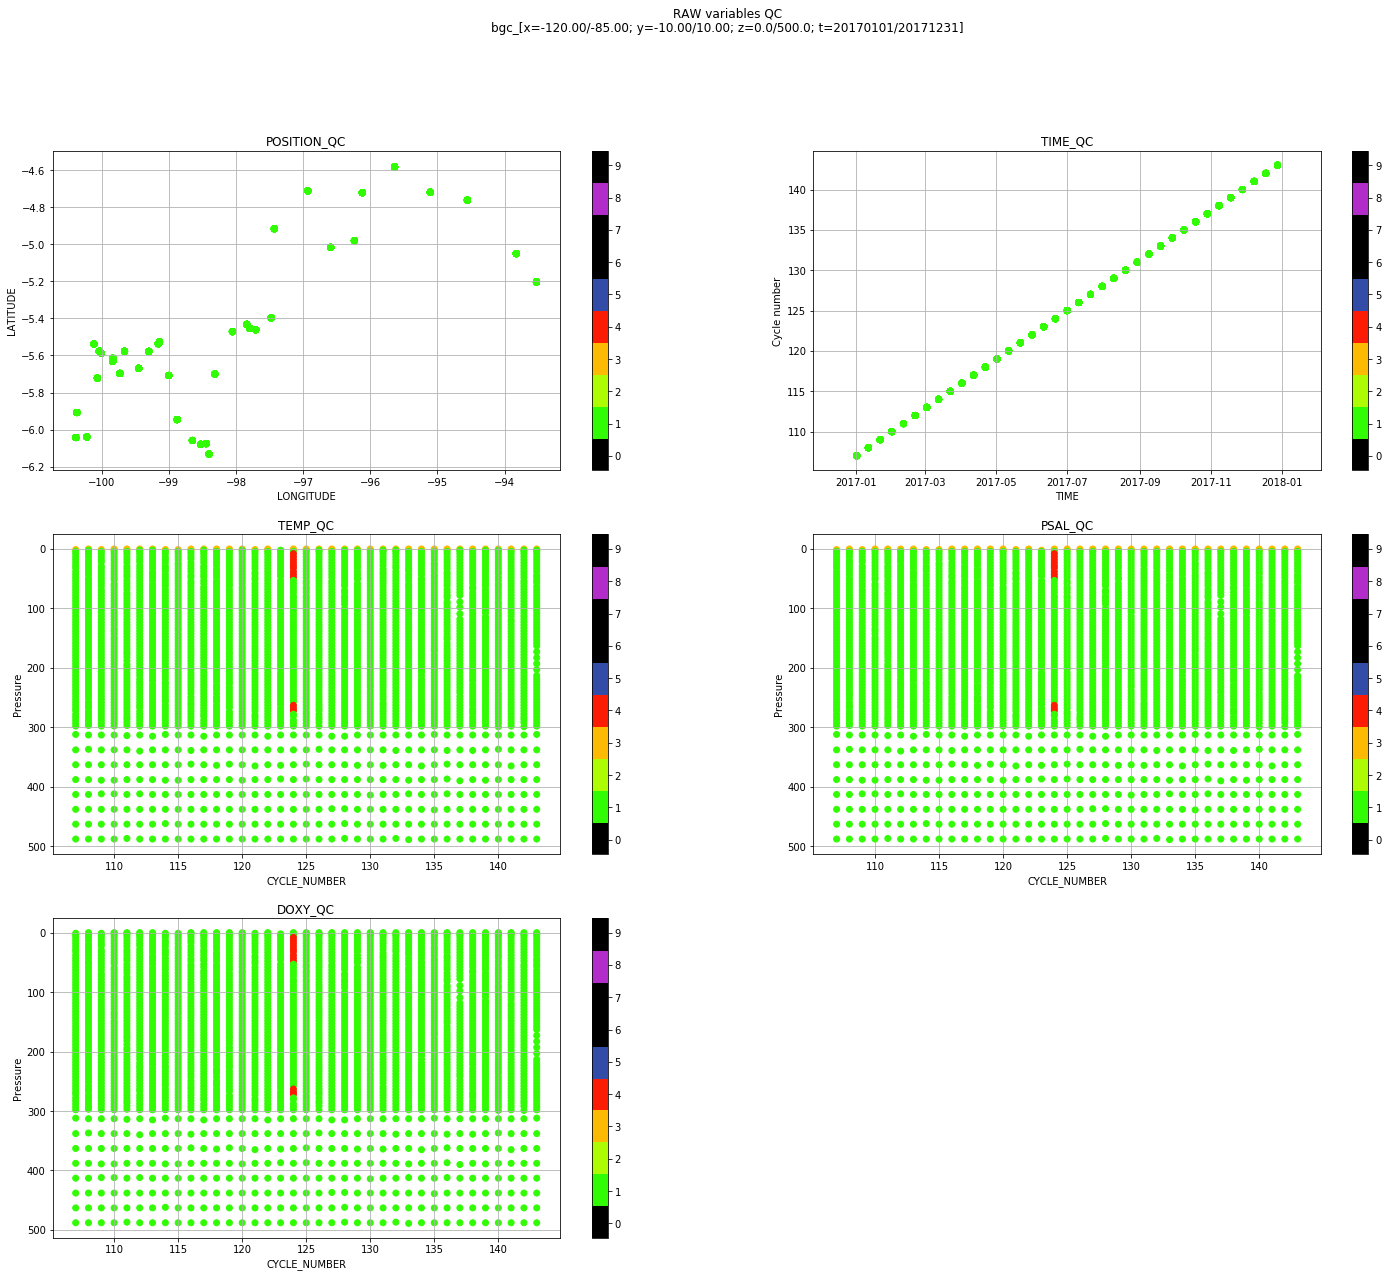

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(25,20))
ax = np.array(ax).flatten()
fig.delaxes(ax[-1])

ix = 0
sc = ax[ix].scatter(ds['LONGITUDE'], ds['LATITUDE'], c=ds['POSITION_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].set_xlabel('LONGITUDE')
ax[ix].set_ylabel('LATITUDE')
ax[ix].set_title('POSITION_QC')

ix += 1
sc = ax[ix].scatter(ds['TIME'].values, ds['CYCLE_NUMBER'], c=ds['TIME_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].set_xlabel('TIME')
ax[ix].set_ylabel('Cycle number')
ax[ix].set_title('TIME_QC')

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['TEMP_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel('CYCLE_NUMBER')
ax[ix].set_ylabel('Pressure')
ax[ix].set_title('TEMP_QC')

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['PSAL_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel('CYCLE_NUMBER')
ax[ix].set_ylabel('Pressure')
ax[ix].set_title('PSAL_QC')

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['DOXY_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel('CYCLE_NUMBER')
ax[ix].set_ylabel('Pressure')
ax[ix].set_title('DOXY_QC')

fig.suptitle("RAW variables QC\n%s" % ds.attrs['Fetched_constraints']);

# Filter data according to data mode

But this is (nearly) the raw output of the request. It could be useful to simply select the most appropriate variables according to the data mode (Real time, adjusted and delayed mode). 

Note that this is done automatically in ``mode='standard'``.

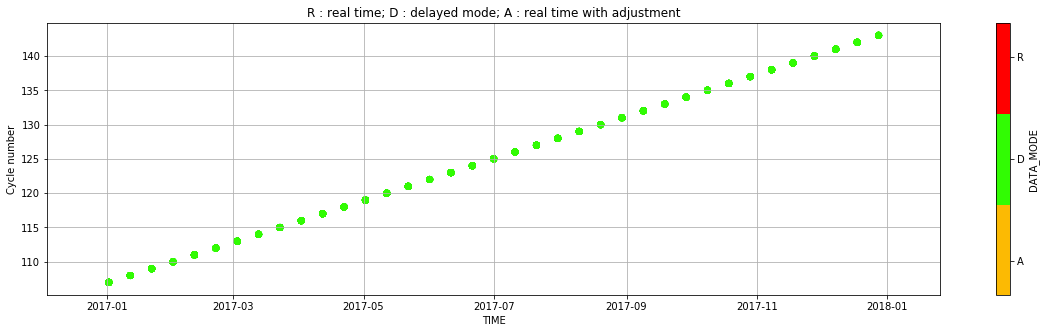

In [5]:
# Inspect data mode
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,5))
ax = np.array(ax).flatten()
sc = ax[0].scatter(ds['TIME'].values, ds['CYCLE_NUMBER'], c=le.transform(ds['DATA_MODE']), 
            vmin=0, vmax=2, cmap=dmode_map)
colorbar_dmode(label='DATA_MODE', ax=ax[0])
ax[0].set_xlabel('TIME')
ax[0].set_ylabel('Cycle number')
ax[0].grid()
ax[0].set_title(ds['DATA_MODE'].attrs['convention']);

## Filter data according to data mode

In [6]:
ds_filtered = ds.argo.filter_data_mode()
ds_filtered

<xarray.Dataset>
Dimensions:          (N_POINTS: 2575)
Coordinates:
    TIME             (N_POINTS) datetime64[ns] 2017-01-01T21:18:00 ... 2017-12-27T21:25:00
    LATITUDE         (N_POINTS) float64 -5.203 -5.203 -5.203 ... -5.538 -5.538
    LONGITUDE        (N_POINTS) float64 -93.53 -93.53 -93.53 ... -100.1 -100.1
  * N_POINTS         (N_POINTS) int64 0 1 2 3 4 5 ... 2570 2571 2572 2573 2574
Data variables:
    CYCLE_NUMBER     (N_POINTS) int64 107 107 107 107 107 ... 143 143 143 143
    DATA_MODE        (N_POINTS) <U1 'R' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_POINTS) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    DOXY             (N_POINTS) float64 203.0 202.7 202.9 ... 2.263 2.981 3.579
    DOXY_ERROR       (N_POINTS) float64 nan nan nan nan nan ... nan nan nan nan
    DOXY_QC          (N_POINTS) int64 1 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    PLATFORM_NUMBER  (N_POINTS) int64 6901459 6901459 ... 6901459 6901459
    POSITION_QC      (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float64 1.0 4.0 8.0 13.0 ... 438.0 463.0 488.0
    PRES_ERROR       (N_POINTS) float64 nan 2.4 2.4 2.4 2.4 ... 2.4 2.4 2.4 2.4
    PRES_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PSAL             (N_POINTS) float64 34.86 34.91 34.94 ... 34.73 34.7 34.67
    PSAL_ERROR       (N_POINTS) float64 nan 0.01 0.01 0.01 ... 0.01 0.01 0.01
    PSAL_QC          (N_POINTS) int64 3 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float64 24.94 24.85 24.66 ... 9.827 9.288 8.726
    TEMP_ERROR       (N_POINTS) float64 nan 0.002 0.002 ... 0.002 0.002 0.002
    TEMP_QC          (N_POINTS) int64 3 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO-BGC
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         http://www.ifremer.fr/erddap
    Fetched_by:           gmaze
    Fetched_date:         2020/04/06
    Fetched_constraints:  bgc_[x=-120.00/-85.00; y=-10.00/10.00; z=0.0/500.0;...
    Fetched_url:          http://www.ifremer.fr/erddap/tabledap/ArgoFloats-bi...
    history:              Variables filtered according to DATA_MODE

## QC figure with appropriate variables

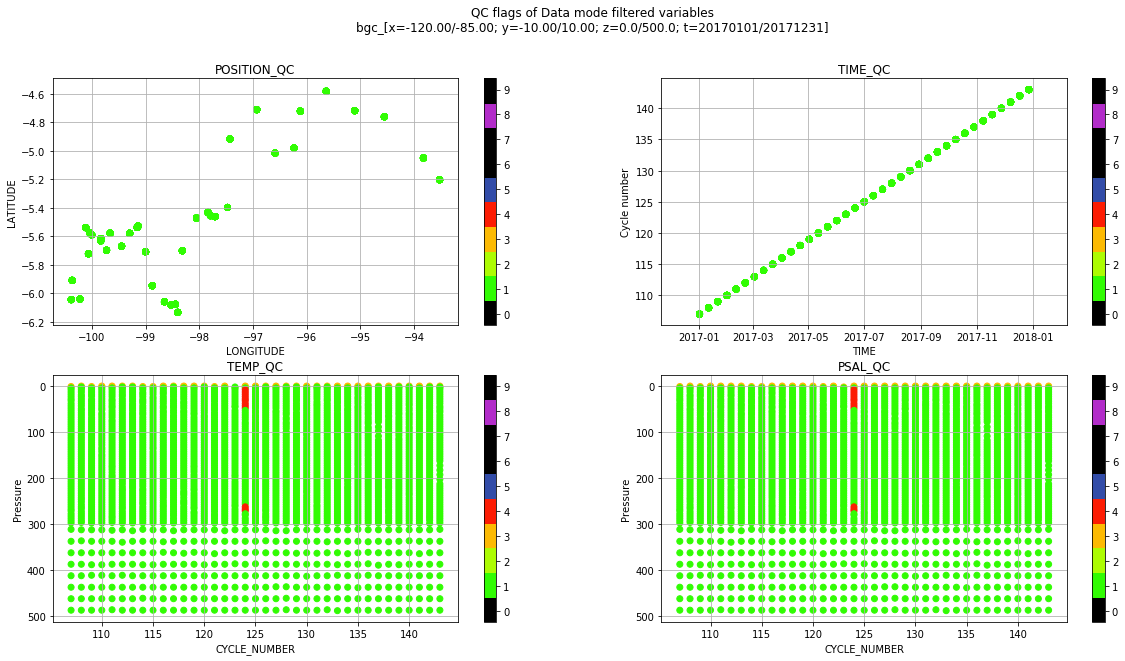

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(ds_filtered['LONGITUDE'], ds_filtered['LATITUDE'], c=ds_filtered['POSITION_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].set_xlabel('LONGITUDE')
ax[ix].set_ylabel('LATITUDE')
ax[ix].set_title('POSITION_QC')

ix += 1
sc = ax[ix].scatter(ds_filtered['TIME'].values, ds_filtered['CYCLE_NUMBER'], c=ds_filtered['TIME_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].set_xlabel('TIME')
ax[ix].set_ylabel('Cycle number')
ax[ix].set_title('TIME_QC')

ix += 1
sc = ax[ix].scatter(ds_filtered['CYCLE_NUMBER'], ds_filtered['PRES'], c=ds_filtered['TEMP_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel('CYCLE_NUMBER')
ax[ix].set_ylabel('Pressure')
ax[ix].set_title('TEMP_QC')

ix += 1
sc = ax[ix].scatter(ds_filtered['CYCLE_NUMBER'], ds_filtered['PRES'], c=ds_filtered['PSAL_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel('CYCLE_NUMBER')
ax[ix].set_ylabel('Pressure')
ax[ix].set_title('PSAL_QC')

fig.suptitle("QC flags of Data mode filtered variables\n%s" % ds.attrs['Fetched_constraints']);

# Example of data fetching for a specific float

In [10]:
float_fetcher = argo_loader.float(3901530)
# float_fetcher = argo_loader.float(6902746)
# float_fetcher = argo_loader.region([-180,180,0,90,0,1000])
# float_fetcher = argo_loader.float(2903005) # Float with a RBRargo sensor
float_fetcher

<datafetcher 'Ifremer erddap Argo data fetcher'>
Domain: bgc_WMO3901530
Backend: erddap
User mode: expert

In [11]:
ds_unfiltered = float_fetcher.to_xarray()
ds = ds_unfiltered.argo.filter_data_mode()
ds

<xarray.Dataset>
Dimensions:          (N_POINTS: 234964)
Coordinates:
    TIME             (N_POINTS) datetime64[ns] 2016-11-28T21:00:00 ... 2019-09-17T19:04:00
    LATITUDE         (N_POINTS) float64 15.0 15.0 15.0 ... 10.19 10.19 10.19
    LONGITUDE        (N_POINTS) float64 -110.0 -110.0 -110.0 ... -105.3 -105.3
  * N_POINTS         (N_POINTS) int64 0 1 2 3 4 ... 234960 234961 234962 234963
Data variables:
    CYCLE_NUMBER     (N_POINTS) int64 1 1 1 1 1 1 1 ... 211 211 211 211 211 211
    DATA_MODE        (N_POINTS) <U1 'A' 'R' 'R' 'R' 'R' ... 'A' 'R' 'A' 'A' 'R'
    DIRECTION        (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A' 'A'
    DOXY             (N_POINTS) float64 nan nan 187.8 nan ... nan nan 23.09
    DOXY_ERROR       (N_POINTS) float64 nan nan nan nan nan ... nan nan nan nan
    DOXY_QC          (N_POINTS) int64 0 0 1 0 0 0 0 1 0 0 ... 0 1 0 1 0 1 0 0 1
    PLATFORM_NUMBER  (N_POINTS) int64 3901530 3901530 ... 3901530 3901530
    POSITION_QC      (N_POINTS) int64 8 8 8 8 8 8 8 8 8 8 ... 8 8 8 8 8 8 8 8 8
    PRES             (N_POINTS) float64 nan 18.6 18.6 ... 1.009e+03 1.014e+03
    PRES_ERROR       (N_POINTS) float64 nan nan nan nan nan ... nan nan nan nan
    PRES_QC          (N_POINTS) int64 0 1 1 1 1 1 0 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PSAL             (N_POINTS) float64 nan 33.73 nan nan ... 34.58 34.58 nan
    PSAL_ERROR       (N_POINTS) float64 nan nan nan nan nan ... nan nan nan nan
    PSAL_QC          (N_POINTS) int64 0 1 0 0 1 0 0 0 1 1 ... 1 0 1 0 1 0 1 1 0
    TEMP             (N_POINTS) float64 nan 29.4 nan nan ... nan 4.536 4.461 nan
    TEMP_ERROR       (N_POINTS) float64 nan nan nan nan nan ... nan nan nan nan
    TEMP_QC          (N_POINTS) int64 0 1 0 0 1 0 0 0 1 1 ... 1 0 1 0 1 0 1 1 0
    TIME_QC          (N_POINTS) int64 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes:
    DATA_ID:              ARGO-BGC
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         http://www.ifremer.fr/erddap
    Fetched_by:           gmaze
    Fetched_date:         2020/04/06
    Fetched_constraints:  bgc_WMO3901530
    Fetched_url:          http://www.ifremer.fr/erddap/tabledap/ArgoFloats-bi...
    history:              Variables filtered according to DATA_MODE

In [ ]:
# Get basic information about the float:
print('This float has performed: %i profiles' % len(np.unique(ds['CYCLE_NUMBER'])))
print('This float operated between %s and %s' % (ds['TIME'].min().values, ds['TIME'].max().values))
print('This float profiles range from %0.1fdb to %0.1fdb' % (ds['PRES'].min(), ds['PRES'].max() ))

## Plot trajectory

In [ ]:
this = ds.reset_coords().groupby('CYCLE_NUMBER').min()
plt.plot(this['LONGITUDE'], this['LATITUDE'], '-', color=[0.7]*3, zorder=0)
plt.scatter(this['LONGITUDE'], this['LATITUDE'], c=this['CYCLE_NUMBER'])
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.gca().grid()
plt.colorbar(label='CYCLE_NUMBER')
plt.title(ds.attrs['Fetched_constraints'])
plt.show()

## QC flags for appropriate variables

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = np.array(ax).flatten()

ix = 0
ax[ix].plot(ds['LONGITUDE'], ds['LATITUDE'], '-', color=[0.7]*3, zorder=0)
sc = ax[ix].scatter(ds['LONGITUDE'], ds['LATITUDE'], c=ds['POSITION_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].set_xlabel('LONGITUDE')
ax[ix].set_ylabel('LATITUDE')
ax[ix].set_title('POSITION_QC')

ix += 1
sc = ax[ix].scatter(ds['TIME'].values, ds['CYCLE_NUMBER'], c=ds['TIME_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].set_xlabel('TIME')
ax[ix].set_ylabel('Cycle number')
ax[ix].set_title('TIME_QC')

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['TEMP_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel('CYCLE_NUMBER')
ax[ix].set_ylabel('Pressure')
ax[ix].set_title('TEMP_QC')

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['PSAL_QC'], vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax[ix])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel('CYCLE_NUMBER')
ax[ix].set_ylabel('Pressure')
ax[ix].set_title('PSAL_QC')

fig.suptitle("Data mode filtered variables QC\n%s" % ds.attrs['Fetched_constraints']);

## DATA MODE

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax = np.array(ax).flatten()
sc = ax[0].scatter(ds['TIME'].values, ds['CYCLE_NUMBER'], c=le.transform(ds['DATA_MODE']), 
            vmin=0, vmax=2, cmap=dmode_map)
colorbar_dmode(label='DATA_MODE', ax=ax[0])
ax[0].set_ylabel('CYCLE_NUMBER')
ax[0].set_xlabel('TIME')
ax[0].grid()
ax[0].set_title(ds['DATA_MODE'].attrs['convention']);

## Hovmoller

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,10), sharex=True, sharey=True)
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['TEMP'], cmap=cmocean.cm.thermal)
plt.colorbar(sc, ax=ax[ix], label=ds['TEMP'].attrs['units'])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['TEMP'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['PSAL'], cmap=cmocean.cm.haline)
plt.colorbar(sc, ax=ax[ix], label=ds['PSAL'].attrs['units'])
ax[ix].grid()
ax[ix].set_xlabel(ds['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['PSAL'].attrs['long_name']);

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['DOXY'], cmap=cmocean.cm.algae)
plt.colorbar(sc, ax=ax[ix], label=ds['DOXY'].attrs['units'])
ax[ix].grid()
ax[ix].set_xlabel(ds['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['DOXY'].attrs['long_name']);

fig.suptitle("%s\n(all data, no QC filter)" % ds.attrs['Fetched_constraints'], fontsize=14);

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10), sharex=True, sharey=True)
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['TEMP'], cmap=cmocean.cm.thermal)
plt.colorbar(sc, ax=ax[ix], label=ds['TEMP'].attrs['units'])
ax[ix].invert_yaxis()
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['TEMP'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['TEMP_ERROR'], cmap=cmocean.cm.amp)
plt.colorbar(sc, ax=ax[ix], label=ds['TEMP_ERROR'].attrs['units'])
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['TEMP_ERROR'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['PSAL'], cmap=cmocean.cm.haline)
plt.colorbar(sc, ax=ax[ix], label=ds['PSAL'].attrs['units'])
ax[ix].set_xlabel(ds['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['PSAL'].attrs['long_name']);

ix += 1
sc = ax[ix].scatter(ds['CYCLE_NUMBER'], ds['PRES'], c=ds['PSAL_ERROR'], cmap=cmocean.cm.amp)
plt.colorbar(sc, ax=ax[ix], label=ds['PSAL_ERROR'].attrs['units'])
ax[ix].set_xlabel(ds['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['PSAL_ERROR'].attrs['long_name']);

## Super-imposed profiles

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(ds['TEMP'], ds['PRES'], c=ds['CYCLE_NUMBER'])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel(ds['TEMP'].attrs['units'])
ax[ix].set_ylabel("%s [%s]" % (ds['PRES'].attrs['long_name'], ds['PRES'].attrs['units']))
ax[ix].set_title(ds['TEMP'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(ds['PSAL'], ds['PRES'], c=ds['CYCLE_NUMBER'])
plt.colorbar(sc, ax=ax[ix], label=ds['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].grid()
ax[ix].set_xlabel(ds['PSAL'].attrs['units'])
ax[ix].set_title(ds['PSAL'].attrs['long_name']);


## T/S diagram

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax = np.array(ax).flatten()
ix = 0
sc = ax[ix].scatter(ds['PSAL'], ds['TEMP'], c=ds['CYCLE_NUMBER'])
ax[ix].grid()
ax[ix].set_xlabel("%s [%s]" % (ds['PSAL'].attrs['long_name'], ds['PSAL'].attrs['units']))
ax[ix].set_ylabel("%s [%s]" % (ds['TEMP'].attrs['long_name'], ds['TEMP'].attrs['units']))
plt.title(ds.attrs['Fetched_constraints']);

# Filter data according to QC flags

In [ ]:
# ds_ok = float_fetcher.fetcher.filter_qc(ds) # By default, drop all points with QC not equal to 1 or 2 in all variables
ds_ok = float_fetcher.fetcher.filter_qc(ds, mode='any') # Keep points with at least of the variable QC in 1 or 2
ds_ok

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10), sharex=True, sharey=True)
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(ds_ok['CYCLE_NUMBER'], ds_ok['PRES'], c=ds_ok['TEMP'], cmap=cmocean.cm.thermal)
plt.colorbar(sc, ax=ax[ix], label=ds_ok['TEMP'].attrs['units'])
ax[ix].invert_yaxis()
ax[ix].set_ylabel("%s [%s]" % (ds_ok['PRES'].attrs['long_name'], ds_ok['PRES'].attrs['units']))
ax[ix].set_title(ds_ok['TEMP'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(ds_ok['CYCLE_NUMBER'], ds_ok['PRES'], c=ds_ok['TEMP_ERROR'], cmap=cmocean.cm.amp)
plt.colorbar(sc, ax=ax[ix], label=ds_ok['TEMP_ERROR'].attrs['units'])
ax[ix].set_ylabel("%s [%s]" % (ds_ok['PRES'].attrs['long_name'], ds_ok['PRES'].attrs['units']))
ax[ix].set_title(ds_ok['TEMP_ERROR'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(ds_ok['CYCLE_NUMBER'], ds_ok['PRES'], c=ds_ok['PSAL'], cmap=cmocean.cm.haline)
plt.colorbar(sc, ax=ax[ix], label=ds_ok['PSAL'].attrs['units'])
ax[ix].set_xlabel(ds_ok['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].set_ylabel("%s [%s]" % (ds_ok['PRES'].attrs['long_name'], ds_ok['PRES'].attrs['units']))
ax[ix].set_title(ds_ok['PSAL'].attrs['long_name']);

ix += 1
sc = ax[ix].scatter(ds_ok['CYCLE_NUMBER'], ds_ok['PRES'], c=ds_ok['PSAL_ERROR'], cmap=cmocean.cm.amp)
plt.colorbar(sc, ax=ax[ix], label=ds_ok['PSAL_ERROR'].attrs['units'])
ax[ix].set_xlabel(ds_ok['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].set_ylabel("%s [%s]" % (ds_ok['PRES'].attrs['long_name'], ds_ok['PRES'].attrs['units']))
ax[ix].set_title(ds_ok['PSAL_ERROR'].attrs['long_name']);

fig.suptitle("Data mode and QC filtered variables\n%s" % ds.attrs['Fetched_constraints']);

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True)
ax = np.array(ax).flatten()

ix = 0
sc = ax[ix].scatter(ds_ok['TEMP'], ds_ok['PRES'], c=ds_ok['CYCLE_NUMBER'])
ax[ix].grid()
ax[ix].invert_yaxis()
ax[ix].set_xlabel(ds_ok['TEMP'].attrs['units'])
ax[ix].set_ylabel("%s [%s]" % (ds_ok['PRES'].attrs['long_name'], ds_ok['PRES'].attrs['units']))
ax[ix].set_title(ds_ok['TEMP'].attrs['long_name'])

ix += 1
sc = ax[ix].scatter(ds_ok['PSAL'], ds_ok['PRES'], c=ds_ok['CYCLE_NUMBER'])
plt.colorbar(sc, ax=ax[ix], label=ds_ok['CYCLE_NUMBER'].attrs['long_name'])
ax[ix].grid()
ax[ix].set_xlabel(ds_ok['PSAL'].attrs['units'])
ax[ix].set_title(ds_ok['PSAL'].attrs['long_name']);

fig.suptitle("Data mode and QC filtered variables\n%s" % ds.attrs['Fetched_constraints']);

***
This work is part and was supported by the following projects:
<div>
<img src="https://avatars1.githubusercontent.com/u/58258213?s=460&v=4" width="70"/>
<img src="http://www.argo-france.fr/wp-content/uploads/2019/10/Argo-logo_banner-color.png" width="200"/>
<img src="https://www.umr-lops.fr/var/storage/images/_aliases/logo_main/medias-ifremer/medias-lops/logos/logo-lops-2/1459683-4-fre-FR/Logo-LOPS-2.png" width="70"/>
</div>